# Problem to be Solved

Remove outliers from a dataset. 

The dataset being experimented on here is from Yahoo Finance, five years worth of data of UOPIX.

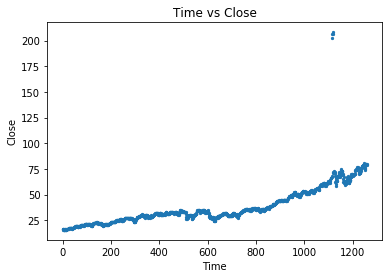

38.100423278571455
341.3283480668772
36.95014739168856


In [163]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Convert CSV file into a Numpy Array
df=pd.read_csv('UOPIX.csv')
df['Time'] = pd.Series(range(1260), index=df.index)

x = df['High']
y = df['Close']

plt.scatter(range(len(y)), y, s = 5)
plt.xlabel('Time')
plt.ylabel('Close')
plt.title('Time vs Close')
plt.show()

print(np.mean(x))
print(np.var(x))
print(np.std(x) * 2)

        

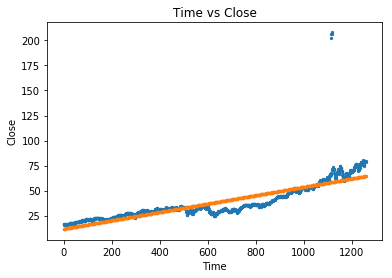

In [164]:
from sklearn import linear_model

model = linear_model.Lasso(alpha=0.000001)
model.fit(df.values[:,7].reshape(-1, 1), df.values[:,2].reshape(-1, 1))
pred = model.predict(np.asarray(range(1260)).reshape(-1, 1))

plt.scatter(range(len(y)), y, s = 5)
plt.scatter(range(1260), pred, s = 5)
plt.xlabel('Time')
plt.ylabel('Close')
plt.title('Time vs Close')
plt.show()


# Detect Outliers & Fix Them

If the outliers are outside of two standard deviations above and below Lasso's predicted value, then replace it with the predicted value.

In [165]:
two_std = np.std(x) * 2
for idx, val in enumerate(df['High']):
    if val > (pred[idx] + two_std) or val < (pred[idx] - two_std):
        df['High'][idx] = pred[idx]
        print(idx, val)

1115 202.419998
1116 206.779999
1117 206.830002
1118 208.179993


C:\Users\Pluto\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


Four entries from the dataset have been caught.

# New Graph without Outliers

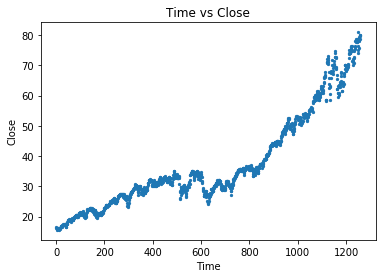

In [166]:
plt.scatter(range(1260), df['High'], s = 5)
plt.xlabel('Time')
plt.ylabel('Close')
plt.title('Time vs Close')
plt.show()